# **Project Title : Predicting whether a customer will default on his/her**

---

# **Problem Description**

**This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments.**





# **Data Description**

# **Attribute Information:**

## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### **X1:** Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

* ### **X2:** Gender (1 = male; 2 = female).

* ### **X3:** Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

* ### **X4:** Marital status (1 = married; 2 = single; 3 = others).
* ### **X5:** Age (year).

* ### **X6 - X11:** History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:

 **X6** = the repayment status in September, 2005;
 
 **X7** = the repayment status in August, 2005;
 
 **X11** = the repayment status in April, 2005. The measurement scale for the repayment status is:

  **-1** = pay duly; 1 = payment delay for one month;
  
   **2** = payment delay for two months; . . .; 
   
   **8** = payment delay for eight months;
   
    **9** = payment delay for nine months and above.

* ### **X12-X17:** Amount of bill statement (NT dollar). 

**X12** = amount of bill statement in September, 2005; 

**X13** = amount of bill statement in August, 2005; . . .; 

**X17** = amount of bill statement in April, 2005.

* ### **X18-X23:** Amount of previous payment (NT dollar). 

**X18** = amount paid in September, 2005; 

**X19** = amount paid in August, 2005; . . .;

**X23** = amount paid in April, 2005.



**Import all the dataset**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier


# **Dataset Information and Summary**

In [4]:
df = pd.read_csv('/content/default of credit card clients.csv',header = 1)

In [5]:
# Viewing the Data of top 5 rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# Viewing the Data of bottom 5 rows
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [7]:
# Viewing the shape of Dataset
df.shape

(30000, 25)

In [8]:
#Viewing the numerical details
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Tha dataset has 30000 observations and 25 features.**

**default payment next month is our target variable**

In [9]:
#Viewing all the columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
# Viewing duplicate value
df.duplicated().sum()

0

In [11]:
#Print the unique value
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [12]:
# Viewing The Relation Between Numerical Columns
corr = df.corr()

In [13]:
#viewing the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

# Missing Value

In [14]:

df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [15]:
# Number of target variable
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

# **Analysis of Independent variable**

We have few categorical features in our dataset:

    Sex
    Education
    Marriage
    Age 

# **Age**

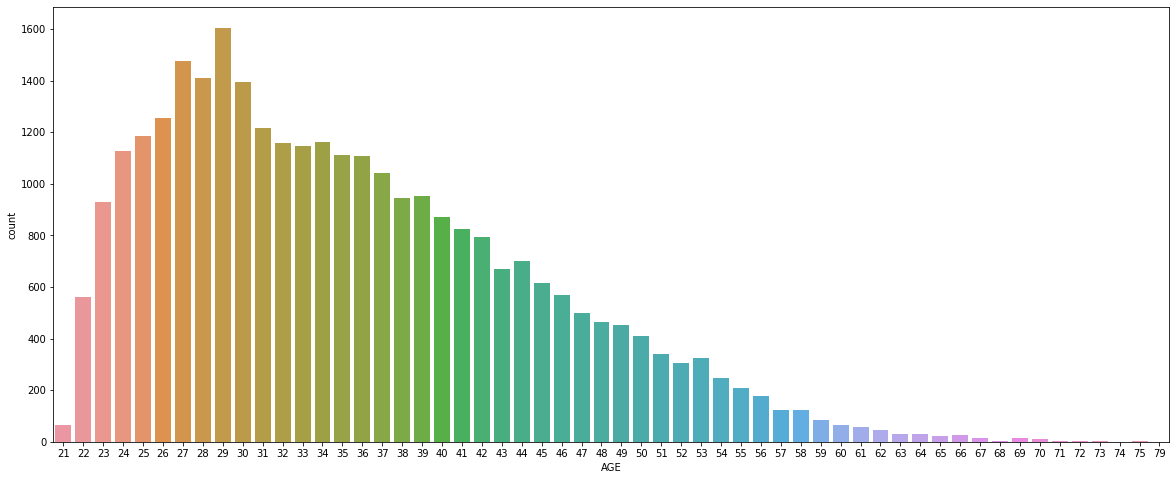

In [16]:
# Plot the graph of number of ages of people with credit card.
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df)

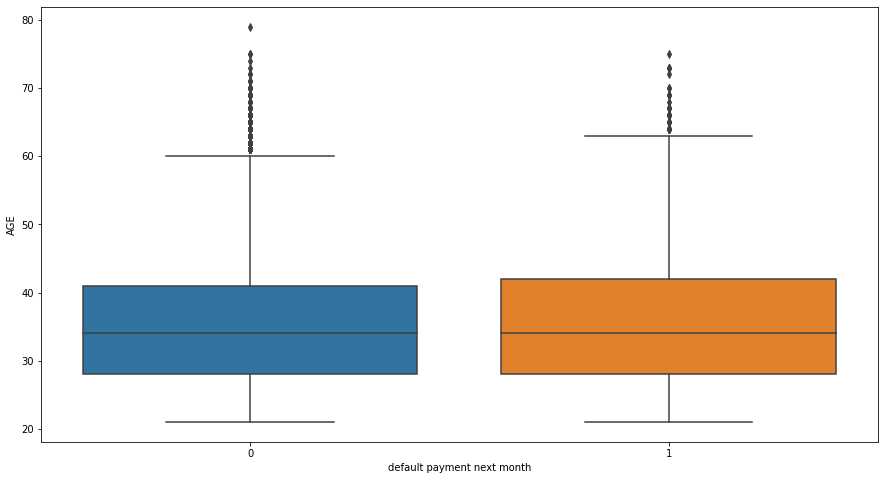

In [17]:
# Plot to check the data distribution
plt.figure(figsize=(15,8))
sns.boxplot(x = 'default payment next month', y = 'AGE', data = df)

# **Education**

In [18]:
# Count the education variable in dataset
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [19]:
df['EDUCATION'] = df['EDUCATION'].replace({4:0,5:0,6:0})
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

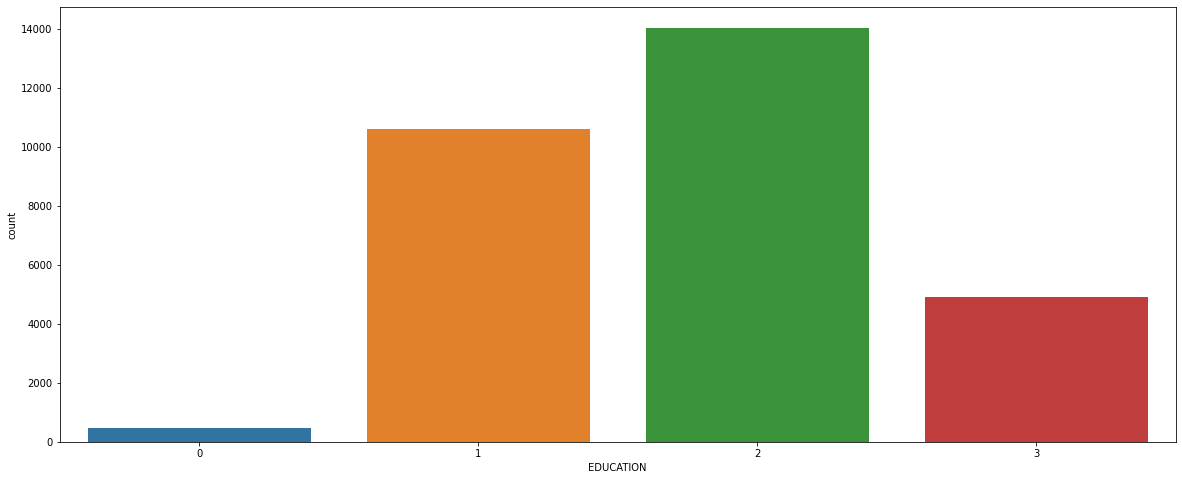

In [20]:
# Plotting the count plot
plt.figure(figsize=(20,8))
sns.countplot(x = 'EDUCATION', data = df)

# **Marriage**

In [21]:
# Count the variables of marriage
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [22]:
# Combine 0 and 3
df['MARRIAGE'] = df['MARRIAGE'].replace({0:3})
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

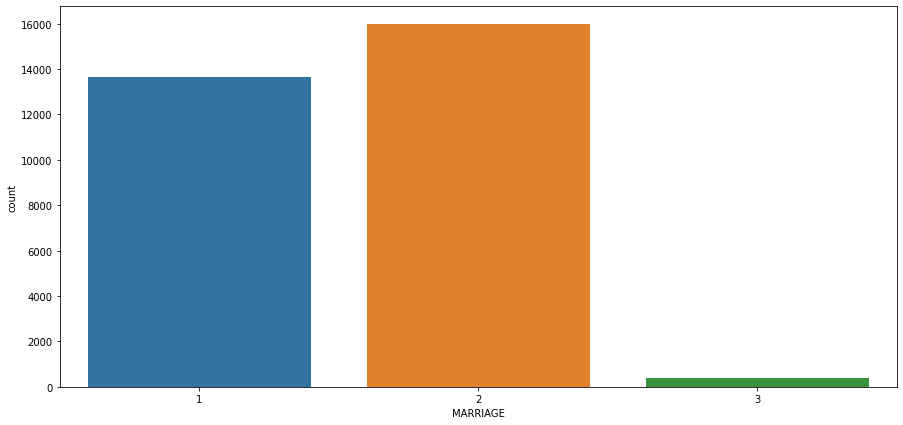

In [23]:
# Plot to view data distribution
plt.figure(figsize=(15,7))
sns.countplot(x = 'MARRIAGE', data = df)

**1 = married**

**2 = single**

**3 = others**

# **Sex**

In [24]:
# Count of variables in dataset
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

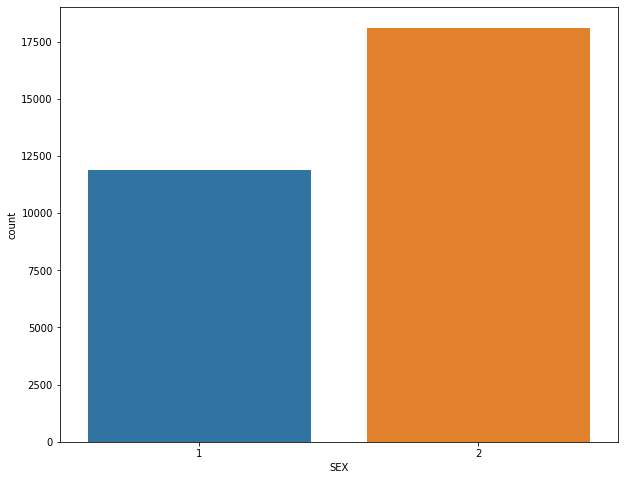

In [25]:
# Plot the graph
plt.figure(figsize=(10,8))
sns.countplot(x = 'SEX', data = df)

From above plot we can see that number of female credit card holder are more than male.

**1: Male**

**2: Female**

# **Numerical Features**

In [26]:
# Limit balance description
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

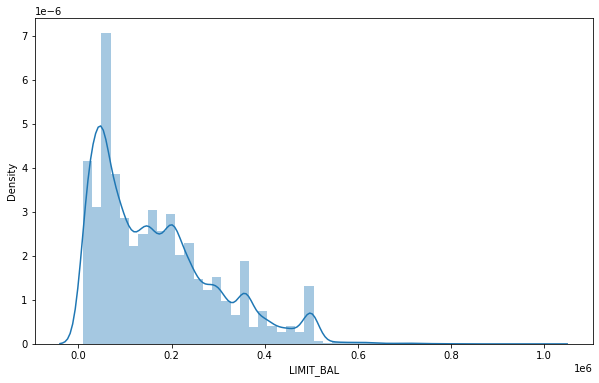

In [27]:
# Plotting distribution plot of Limit Bal
plt.figure(figsize = (10,6))
sns.distplot(df['LIMIT_BAL'], kde = True)

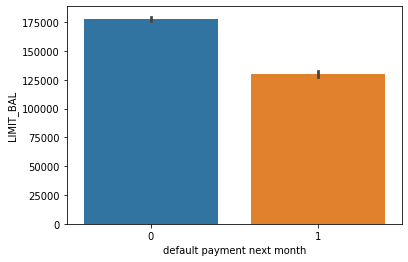

In [28]:
# View the data distribution with respect to target variable
sns.barplot(x = 'default payment next month', y = 'LIMIT_BAL', data = df)

1 = yes 

0 = NO

In [29]:
# Rename the column for simplycity
df.rename(columns={'PAY_0':'PAY_SEP','PAY_2':'PAY_AUG','PAY_3':'PAY_JULY','PAY_4':'PAY_JUNE','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace = True)
df.rename(columns={'BILL_AMT1':'BILL_SEP','BILL_AMT2':'BILL_AUG','BILL_AMT3':'BILL_JULY','BILL_AMT4':'BILL_JUNE',
                               'BILL_AMT5':'BILL_MAY','BILL_AMT6':'BILL_APR'},inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEP','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JULY','PAY_AMT4':'PAY_AMT_JUNE',
                               'PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'}, inplace = True)

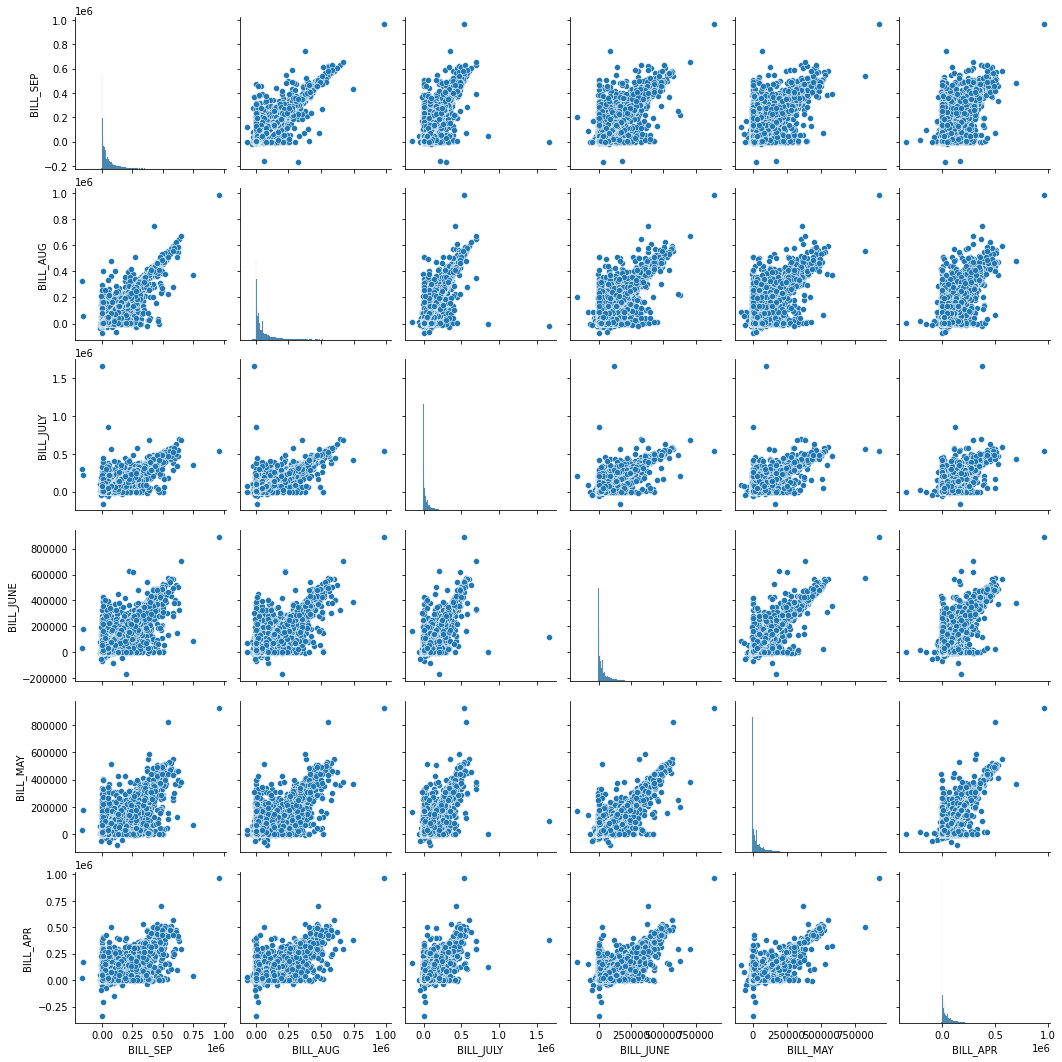

In [30]:
# Plot a single variable for the bill amount and plot the pairplot 
total_bill_amt = df[['BILL_SEP','BILL_AUG','BILL_JULY','BILL_JUNE','BILL_MAY','BILL_APR']]
sns.pairplot(data = total_bill_amt)

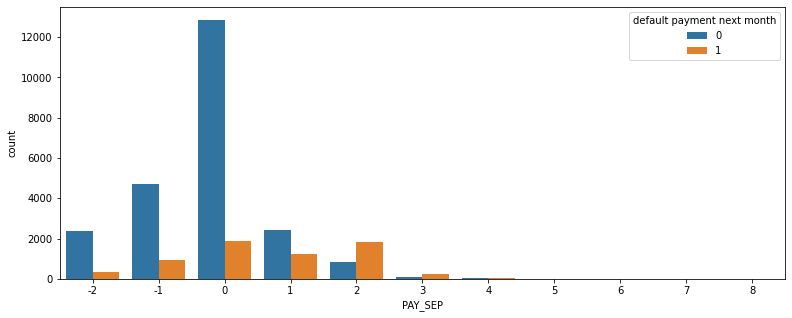

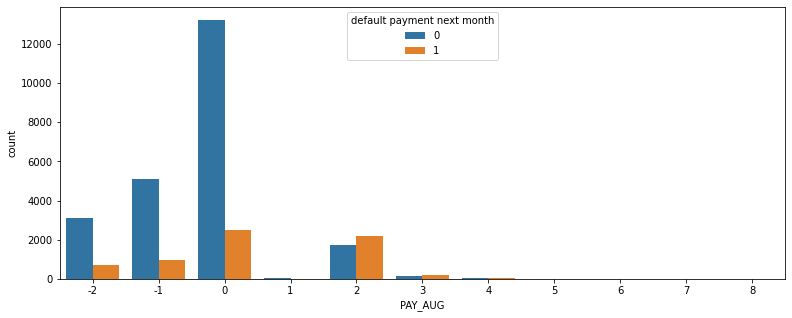

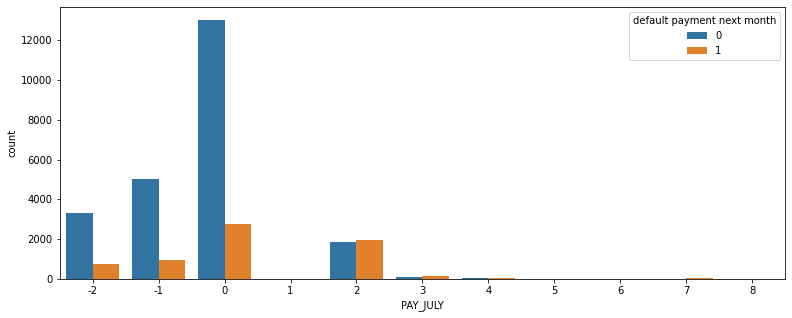

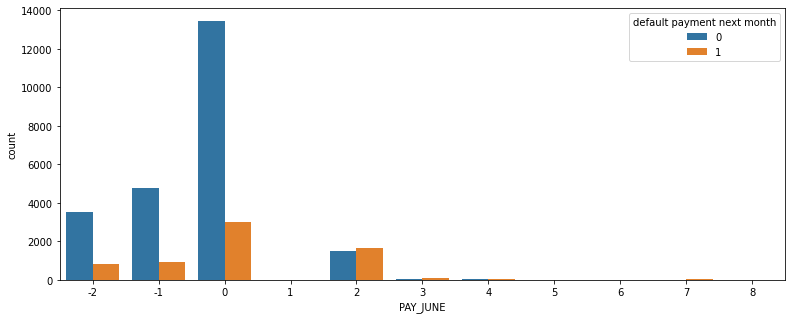

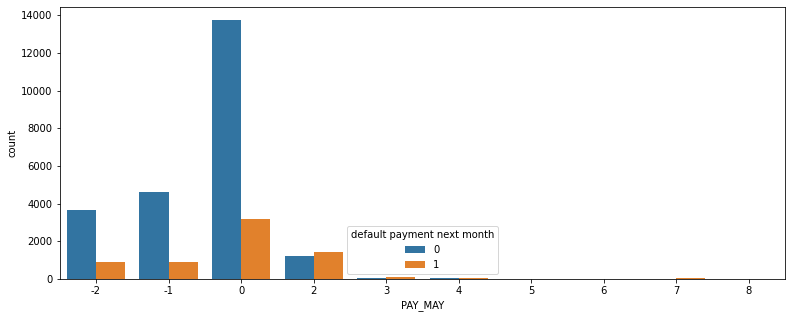

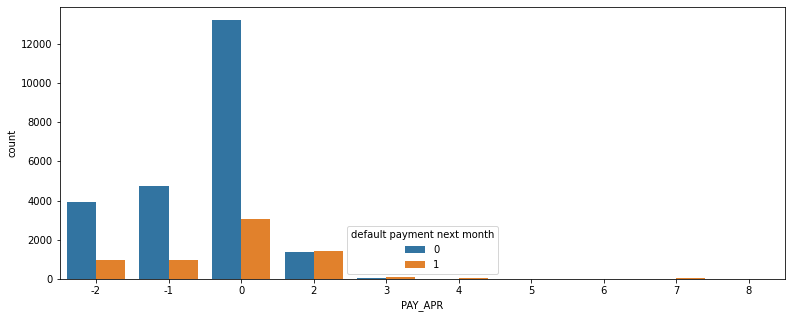

In [31]:
#plotting the count plot for Previous payment
previous_payment = ['PAY_SEP','PAY_AUG','PAY_JULY','PAY_JUNE','PAY_MAY','PAY_APR']
for col in previous_payment:
  plt.figure(figsize=(13,5))
  sns.countplot(x = col, hue = 'default payment next month', data = df)

# **Paid amount**

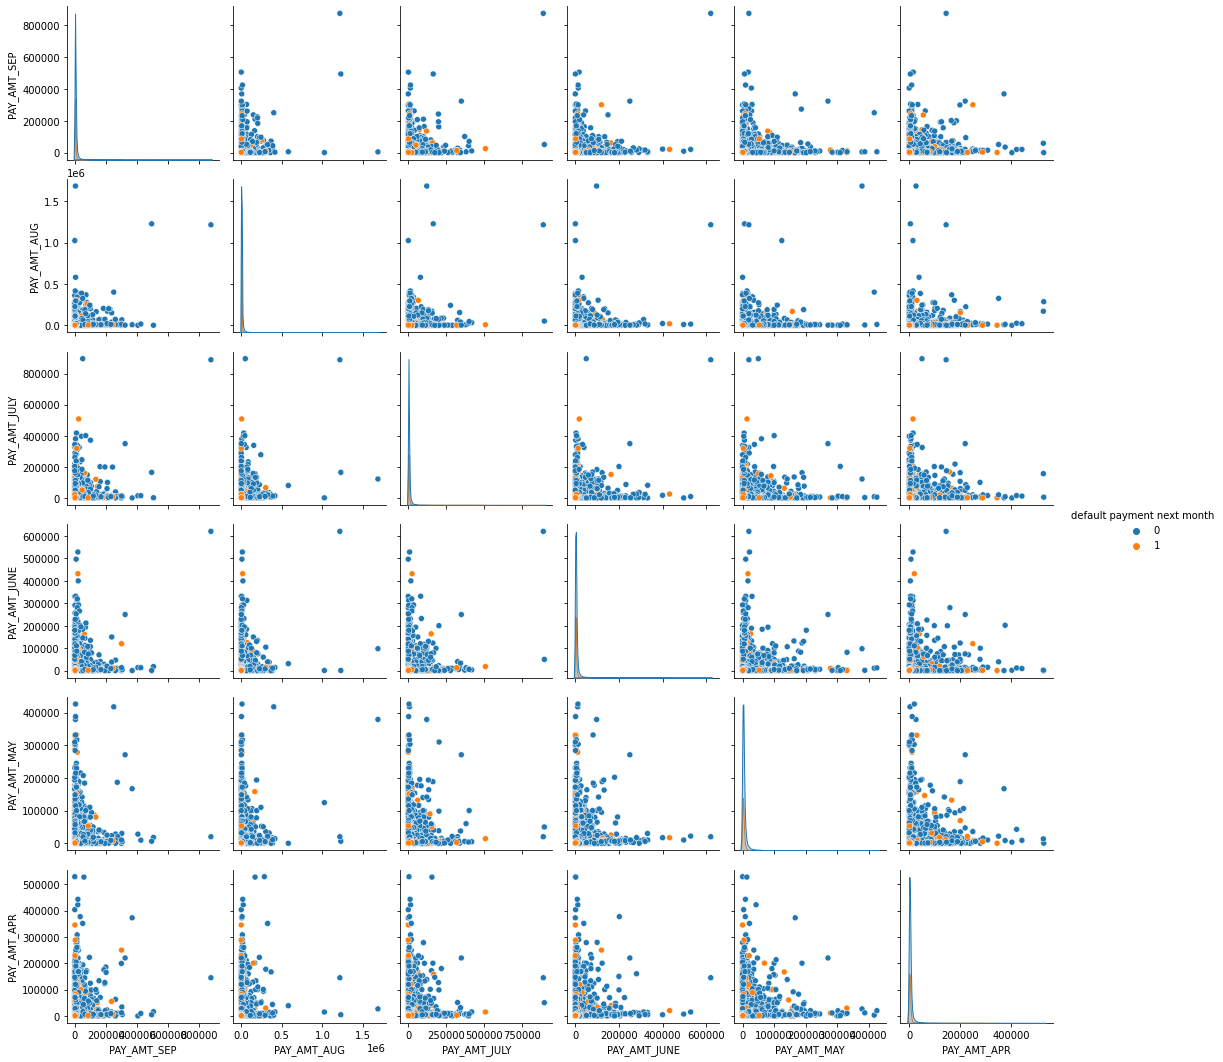

In [32]:
# Create a single variable and plot pairplot
paid_amt = df[['PAY_AMT_SEP','PAY_AMT_AUG','PAY_AMT_JULY','PAY_AMT_JUNE','PAY_AMT_MAY','PAY_AMT_APR','default payment next month']]
sns.pairplot(data = paid_amt, hue = 'default payment next month')

In [33]:

# Create a dataframe copy
df_copy = df.copy()

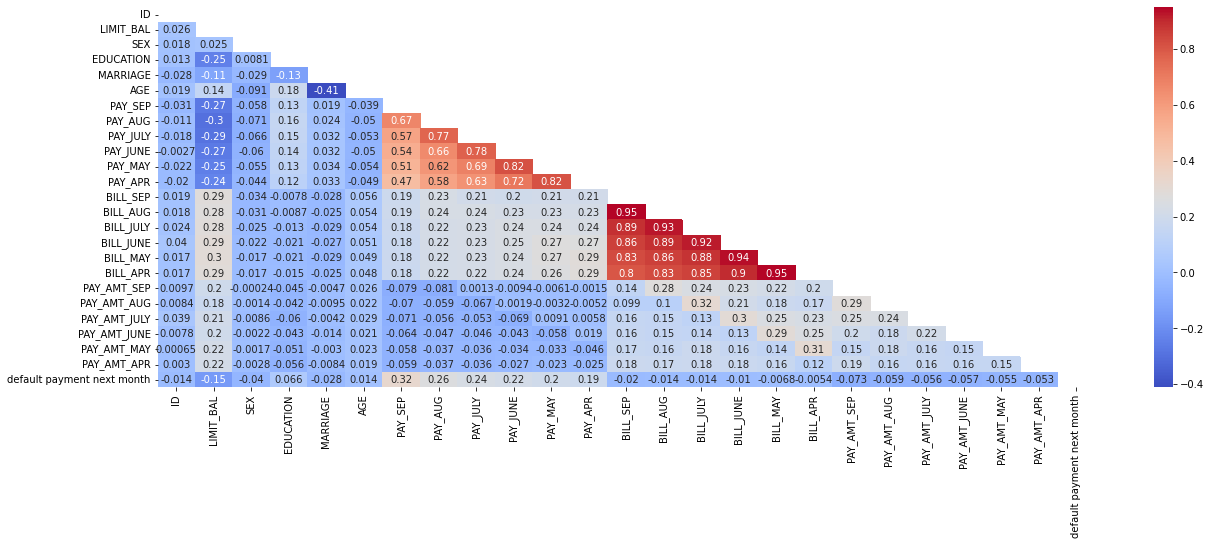

In [34]:
# Heatmap plot for correlation between different variable
plt.figure(figsize=(21,7))
correlation = df_copy.corr()
mask = np.triu(np.ones_like(df_copy.corr()))
sns.heatmap((correlation),mask=mask,annot=True,cmap='coolwarm')

we can see in above plot that some variable like age are negatively correlated. We can ignore ID as it will not effect the result.

# **SMOTE(Synthetic Minority Oversampling Technique):**

Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input.



**1.**   In our dataset we have high imbalanced data distribution in target variable, this happens generally when observation in one of the class are much higher.

**2.**   Machine learning techniques such as Decision Trees and Logistic Regression is biased towards majority class and tend to ignore minority class.



In [35]:
smote = SMOTE()

In [36]:
# Fit the target and predictor variable
x_smote,y_smote = smote.fit_resample(df_copy.iloc[:,0:-1],df_copy['default payment next month'])
print('Original dataset observation',len(df_copy))
print('Resampled dataset observation',len(y_smote))

Original dataset observation 30000
Resampled dataset observation 46728


In [37]:
columns = list(df_copy.columns)
columns.pop()

'default payment next month'

In [38]:
# Create a variable name for balanced dataframe
balanced_credit_data_df = pd.DataFrame(x_smote, columns=columns)
balanced_credit_data_df['default payment next month'] = y_smote

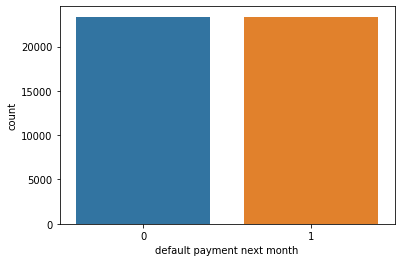

In [39]:
# Count plot after applying smote
sns.countplot('default payment next month', data = balanced_credit_data_df)

In [40]:
balanced_credit_data_df[balanced_credit_data_df['default payment next month']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_JUNE,BILL_MAY,BILL_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APR,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,26146,50000,2,2,1,50,0,0,0,0,...,30535,27001,28160,2954,9739,4886,1483,2000,2000,1
46724,18806,410000,1,1,2,38,0,0,0,0,...,24442,24659,38554,4454,2176,13986,7152,16622,1686,1
46725,25699,280000,1,1,1,51,0,0,0,-2,...,-800,1008,381,2,266,0,2076,381,903,1
46726,24871,50000,1,2,2,43,0,1,0,0,...,16793,18589,18979,75,1351,1127,1922,531,624,1


# **Feature Engineering**

In [41]:
# create a variable and copy the balanced dataset
credit_df_copy = balanced_credit_data_df.copy()

In [42]:
# Assign the sum of payment value in one
credit_df_copy['total_pay_value'] = credit_df_copy['PAY_SEP']+credit_df_copy['PAY_AUG']+credit_df_copy['PAY_JULY']+credit_df_copy['PAY_JUNE']+credit_df_copy['PAY_MAY']+credit_df_copy['PAY_APR']
credit_df_copy['total_pay_value']

0       -2
1        3
2        0
3        0
4       -2
        ..
46723    0
46724    1
46725   -4
46726    1
46727    3
Name: total_pay_value, Length: 46728, dtype: int64

In [43]:
# Check the correlation using mean
credit_df_copy.groupby('default payment next month')['total_pay_value'].mean()

default payment next month
0   -1.980140
1    1.663029
Name: total_pay_value, dtype: float64

**Plot the box plot**

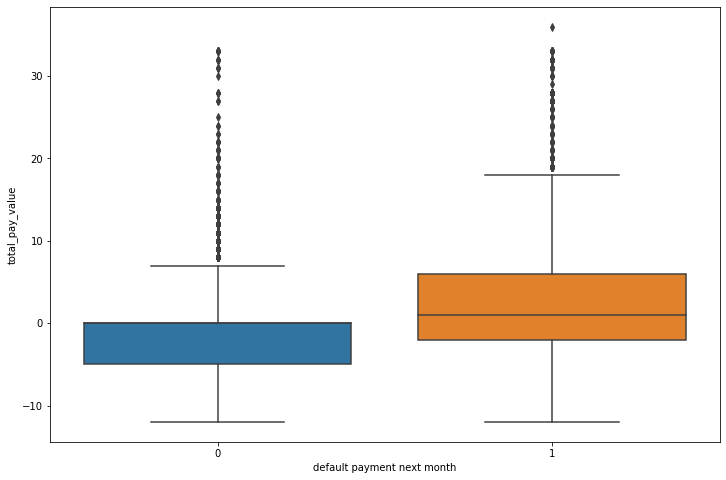

In [44]:
# View box plot
plt.figure(figsize=(12,8))
sns.boxplot(data = credit_df_copy, x = 'default payment next month', y = 'total_pay_value')

In [45]:
# Create a column of amount due by summing total bill amount and subtracting it from total amount paid
credit_df_copy['amt_due'] = (credit_df_copy['BILL_SEP']+credit_df_copy['BILL_AUG']+credit_df_copy['BILL_JULY']+credit_df_copy['BILL_JUNE']+credit_df_copy['BILL_MAY']+credit_df_copy['BILL_APR']) - (credit_df_copy['total_pay_value'])


In [46]:
# Check the correlation by calculating the mean
credit_df_copy.groupby('default payment next month')['amt_due'].mean()

default payment next month
0    272430.887990
1    258217.662258
Name: amt_due, dtype: float64

In [47]:
#  Change the features observation to categorical
credit_df_copy.replace({'SEX': {1 : 'male', 2 : 'female'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others',0:'others'},
                        'MARRIAGE' :{1 : 'married' , 2: 'single', 3: 'others'}},inplace = True)

In [48]:
# Final dataset
credit_df_copy.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APR,default payment next month,total_pay_value,amt_due
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,7706
1,2,120000,female,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,17074
2,3,90000,female,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,101653
3,4,50000,female,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,231334
4,5,50000,male,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,109341


# **One Hot Encoding**

One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns.

In [49]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [50]:
# Apply one hot encoding
credit_df_copy = pd.get_dummies(credit_df_copy, columns=["MARRIAGE", "EDUCATION"])

In [51]:
# Apply one hot encoding
credit_df_copy = pd.get_dummies(credit_df_copy, columns=['PAY_SEP','PAY_AUG','PAY_JULY','PAY_JUNE','PAY_MAY','PAY_APR'], drop_first=True)

In [52]:
#Apply label encoding on sex column
credit_df_copy['SEX'] = credit_df_copy['SEX'].apply(lambda x:1 if x == 'male' else 0)

In [53]:
# View the name of the column
credit_df_copy.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'BILL_SEP', 'BILL_AUG', 'BILL_JULY',
       'BILL_JUNE', 'BILL_MAY', 'BILL_APR', 'PAY_AMT_SEP', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default payment next month', 'total_pay_value', 'amt_due',
       'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single',
       'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_others', 'EDUCATION_university', 'PAY_SEP_-1', 'PAY_SEP_0',
       'PAY_SEP_1', 'PAY_SEP_2', 'PAY_SEP_3', 'PAY_SEP_4', 'PAY_SEP_5',
       'PAY_SEP_6', 'PAY_SEP_7', 'PAY_SEP_8', 'PAY_AUG_-1', 'PAY_AUG_0',
       'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4', 'PAY_AUG_5',
       'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8', 'PAY_JULY_-1', 'PAY_JULY_0',
       'PAY_JULY_1', 'PAY_JULY_2', 'PAY_JULY_3', 'PAY_JULY_4', 'PAY_JULY_5',
       'PAY_JULY_6', 'PAY_JULY_7', 'PAY_JULY_8', 'PAY_JUNE_-1', 'PAY_JUNE_0',
       'PAY_JUNE_1', 'PAY_JUNE_2', 'PAY_JUNE_3', 'PAY_JUNE_4',

In [54]:
# Check the shape of dataset after applying one hot encoding
credit_df_copy.shape


(46728, 86)

In [55]:
credit_df_copy.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_SEP,BILL_AUG,BILL_JULY,BILL_JUNE,BILL_MAY,BILL_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


# **Performance Metrics**

**Performance Metrics**



*   Precision is a good metric to use when the costs of false positive(FP) is high.

*   Precision = TP / (TP + FP)

*   Recall is a good metric to use when the cost associated with false negative(FN) is high.

*  Recall = TP / (TP + FN) 


*  F1-score is a weighted average of precision and recall. Thus, it considers FP and FN. This metric is very useful when we have uneven class distribution, as it seeks a balance between precision and recall.


*   F1-score = 2 (precision recall) / (precision + recall)

**In this classification problem there is high cost for bank when a default credit card is predicted as non defaulter. So we will give more importance to recall.**












# **Logistic Regression Implementation**

In [56]:
# create a copy of dataset
credit_df_logistic = credit_df_copy.copy()

# **Train - Test Split**

In [57]:
# Apply Logistic Regression
from sklearn.linear_model import LogisticRegression

X = credit_df_logistic.drop(['default payment next month','total_pay_value','amt_due'],axis=1)
y = credit_df_logistic['default payment next month'] 

In [58]:
columns = X.columns

In [59]:
# Apply standardscalar to standardise x value
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [60]:
# Split the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42, stratify=y)


# **Hyperparameter tuning using GridSearchCV**

**Hyperparameter Tuning**


* Hyperparameter tuning is an essential part of controlling the behavior of a machine learning model.  
*  Hyperparameters are important because they directly control the behaviour of the training algorithm and have a significant impact on the performance of the model is being trained.

In [61]:
# Set the parameter
param_test = {'n_estimators':range(30,151,20)} 

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]}

In [62]:
# Fit the parameter
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 5)
grid_lr_clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='accuracy', verbose=3)

In [63]:
optimized_clf_result = grid_lr_clf.best_estimator_
grid_lr_clf.best_estimator_

LogisticRegression(C=0.1)

In [64]:
grid_lr_clf.best_score_

0.7529818458395351

In [65]:
# Predicted probability
train_pred = optimized_clf_result.predict_proba(X_train)[:,1]
test_pred = optimized_clf_result.predict_proba(X_test)[:,1]

In [66]:
# Get the predicted classes
train_class_pred = optimized_clf_result.predict(X_train)
test_class_pred = optimized_clf_result.predict(X_test)

# **Model Evaluation**

In [67]:
# Get the accuracy score
train_accuracy_logistic = accuracy_score(train_class_pred,y_train)
test_accuracy_logistic = accuracy_score(test_class_pred,y_test)
print('The accuracy on train data is', train_accuracy_logistic)
print('The accuracy on test data is', test_accuracy_logistic)


The accuracy on train data is 0.753666609598813
The accuracy on test data is 0.7514980311590481


In [68]:
# Get the accuracy, precision, recall, f1score, roc_score
test_accuracy_logistic = accuracy_score(test_class_pred,y_test)
test_precision_logistic = precision_score(test_class_pred,y_test)
test_recall_logistic = recall_score(test_class_pred,y_test)
test_f1_logistic = f1_score(test_class_pred,y_test)
test_roc_logistic = roc_auc_score(test_class_pred,y_test)

print('The accuracy on test data is',test_accuracy_logistic)
print('The precision on test data is',test_precision_logistic)
print('The recall on test data is',test_recall_logistic)
print('The f1 score on test data is',test_f1_logistic)
print('The roc score on test data is',test_roc_logistic)

The accuracy on test data is 0.7514980311590481
The precision on test data is 0.687211093990755
The recall on test data is 0.7886051080550098
The f1 score on test data is 0.734425029731955
The roc score on test data is 0.7557254909207088


We have implemented logistic regression and we getting f1_sore approx 73.5%. As we have imbalanced dataset, F1 score is better parameter.

# **Confusion Matrix**

A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.


In [69]:
# Get the confusion matrix for train and test data
confusion_matrix_logistic = confusion_matrix(y_train, train_class_pred)
print(confusion_matrix_logistic)

[[14305  3218]
 [ 5415 12108]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

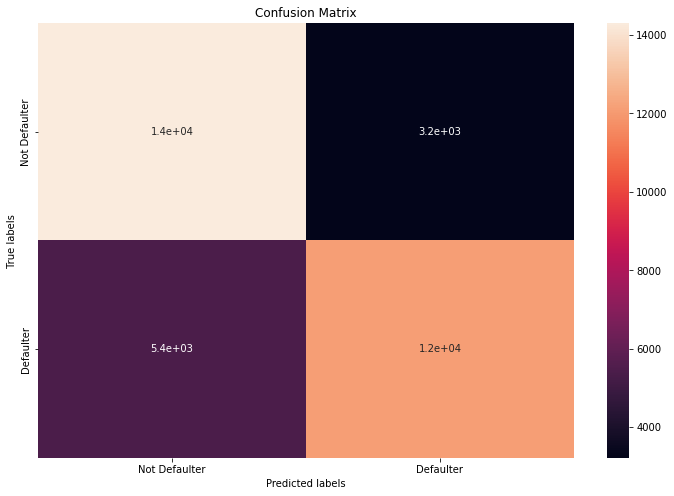

In [70]:
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_logistic, annot=True, ax = ax)
labels = ['Not Defaulter', 'Defaulter']

ax.set_xlabel('Predicted labels')
ax.set_ylabel(' True labels ')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [71]:
# Create a varaiable and assign features and importance
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf_result.coef_).ravel() })
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

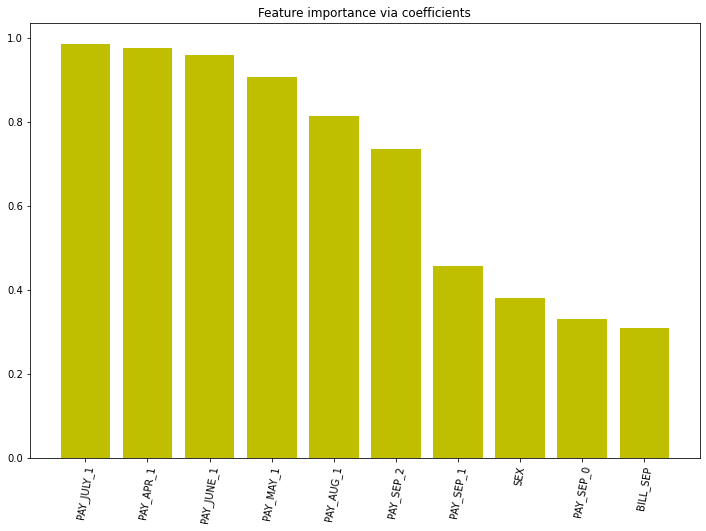

In [72]:
plt.figure(figsize=(12,8))
plt.bar(height=feature_importance['Importance'],x= feature_importance['Features'],color ='y')
plt.xticks(rotation=80)
plt.title('Feature importance via coefficients')
plt.show()

 From above plot we can see that PAY_MAY_1, PAY_APR_1 and PAY_JUNE_1 are the most important feature that make impact on dependent variable.

# **ROC AUC Curve**




  

*   In Machine Learning, performance measurement is an essential task. So when it comes to a classification problem, we can count on an AUC - ROC Curve.


* An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters.

*  True Positive Rate 


*   False Positive Rate

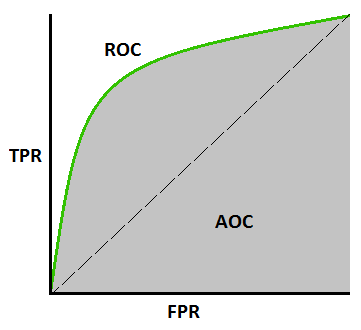



*   AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve










# **Defining terms used in AUC and ROC Curve.**

**TPR (True Positive Rate) / Recall /Sensitivity**

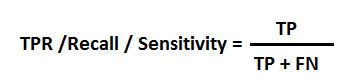

# **Specificity**

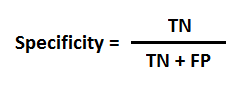

# **FPR**

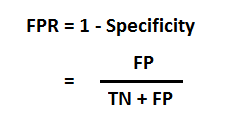





In [73]:
y_pred_proba_logistic = optimized_clf_result.predict_proba(X_test)[::,1]

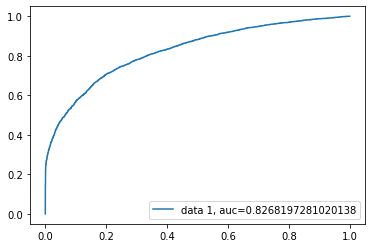

In [74]:
y_pred_proba = y_pred_proba_logistic
fpr,tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label= 'data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

# **XGBoost Implementation**

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning.

In [75]:
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test)

In [76]:
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}


In [77]:
num_round = 50
start = datetime.now()
xg= xgb.train(parameters,dtrain,num_round)
stop = datetime.now()

In [78]:
execution_time_xgb = stop-start
execution_time_xgb

datetime.timedelta(seconds=7, microseconds=521262)

In [79]:
# Predicting our model on train set
train_class_pred_probs = xg.predict(dtrain)

In [80]:
# Predicting our model on test set
test_class_pred_probs = xg.predict(dtest)
len(train_class_pred_probs)

35046

In [81]:
train_class_pred = []
test_class_pred = []
for i in range(0,len(train_class_pred_probs)):
  if train_class_pred_probs[i] >= 0.5:
    train_class_pred.append(1)
  else:
    train_class_pred.append(0)

for i in range(0,len(test_class_pred_probs)):
  if test_class_pred_probs[i] >= 0.5:
    test_class_pred.append(1)
  else:
    test_class_pred.append(0)

In [82]:
test_class_pred_probs[:20]

array([0.85501164, 0.14881356, 0.652327  , 0.23106343, 0.54365206,
       0.16987005, 0.9576594 , 0.23467678, 0.44815192, 0.7965975 ,
       0.44096085, 0.20262793, 0.5299938 , 0.40785444, 0.16723038,
       0.9207717 , 0.20310912, 0.54902315, 0.23761968, 0.55571854],
      dtype=float32)

In [83]:
test_class_pred[:20]

[1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1]

In [84]:
len(y_train)

35046

In [85]:
len(train_class_pred)

35046

# **Model Evaluation**

In [86]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_pred,y_train)
test_accuracy_xgb = accuracy_score(test_class_pred,y_test)


In [87]:
print('The accuracy on train data is ', train_accuracy_xgb)
print('The accuracy on test data is ', test_accuracy_xgb)

The accuracy on train data is  0.7874507789762027
The accuracy on test data is  0.7742681047765794


In [88]:
# Get the accuracy, precision, recall, f1score, roc_score
test_accuracy_xgb = accuracy_score(test_class_pred,y_test)
test_precision_xgb = precision_score(test_class_pred,y_test)
test_recall_xgb = recall_score(test_class_pred,y_test)
test_f1_xgb = f1_score(test_class_pred,y_test)
test_roc_xgb = roc_auc_score(test_class_pred,y_test)

print('The accuracy on test data is', test_accuracy_xgb)
print('The precision on test data is', test_precision_xgb)
print('The recall on test data is', test_recall_xgb)
print('The f1 score on test data is', test_f1_xgb)
print('The roc score on test data is', test_roc_xgb)

The accuracy on test data is 0.7742681047765794
The precision on test data is 0.7055298750214004
The recall on test data is 0.8179833267169512
The f1 score on test data is 0.7576063976468425
The roc score on test data is 0.7795515670309621



# **Confusion Matrix**

In [89]:
# Get the confusion matrix for train and test data
confusion_matrix_xgb = confusion_matrix(y_train, train_class_pred)
print(confusion_matrix_xgb)

[[15037  2486]
 [ 4963 12560]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

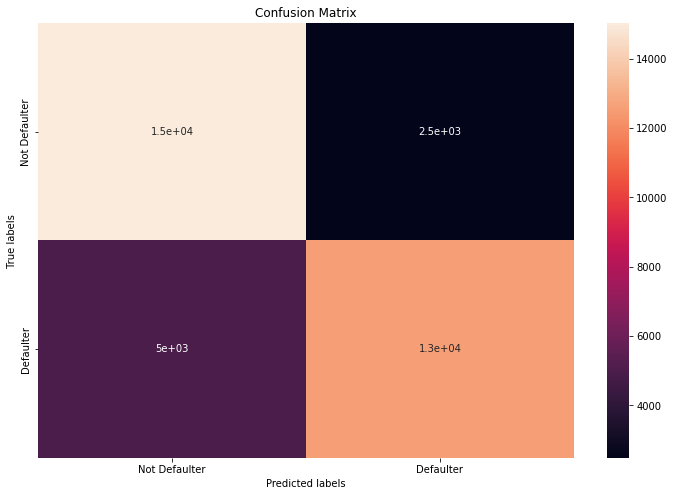

In [90]:
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_xgb, annot=True, ax = ax)
labels = ['Not Defaulter', 'Defaulter']

ax.set_xlabel('Predicted labels')
ax.set_ylabel(' True labels ')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Hyperparameter Tuning**

**Hyperparameter Tuning**


* Hyperparameter tuning is an essential part of controlling the behavior of a machine learning model.  
*  Hyperparameters are important because they directly control the behaviour of the training algorithm and have a significant impact on the performance of the model is being trained.

In [91]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=140,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
                                                objective = 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test1,scoring='accuracy',n_jobs=-1,cv=3,verbose=2)
gsearch1.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=140, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [92]:
 # Get the best score
 gsearch1.best_score_

0.8272841408434629

In [93]:
# Get the best estimator
optimal_xgb_result = gsearch1.best_estimator_

In [94]:
# Get the predicted class
train_class_pred = optimal_xgb_result.predict(X_train)
test_class_pred = optimal_xgb_result.predict(X_test)

In [95]:
# Get the accuracy score after hyperparameter tuning
train_accuracy_xgb_tuned = accuracy_score(train_class_pred,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_pred,y_test)

print('The accuracy score on train data after hyperparameter tuning is ', train_accuracy_xgb_tuned)
print('The accuracy score on test data after hyperparameter tuning is', test_accuracy_xgb_tuned)

The accuracy score on train data after hyperparameter tuning is  0.916138789020145
The accuracy score on test data after hyperparameter tuning is 0.8330765279917822


In [96]:
# Get the accuracy, precision, recall, f1score, roc_score after tuning
test_accuracy_xgb_tuned = accuracy_score(test_class_pred,y_test)
test_precision_xgb_tuned = precision_score(test_class_pred,y_test)
test_recall_xgb_tuned = recall_score(test_class_pred,y_test)
test_f1_xgb_tuned = f1_score(test_class_pred,y_test)
test_roc_xgb_tuned = roc_auc_score(test_class_pred,y_test)

print('The accuracy on test data after hyperparameter tuning is ', test_accuracy_xgb_tuned)
print('The Precision on test data after hyperparameter tuning is ', test_precision_xgb_tuned)
print('The recall on test data after hyperparameter tuning is ', test_recall_xgb_tuned)
print('The f1 score on test data after hyperparameter tuning is ', test_f1_xgb_tuned)
print('The roc score on test data after hyperparameter tuning is ', test_roc_xgb_tuned)

The accuracy on test data after hyperparameter tuning is  0.8330765279917822
The Precision on test data after hyperparameter tuning is  0.7950693374422187
The recall on test data after hyperparameter tuning is  0.8604780433574208
The f1 score on test data after hyperparameter tuning is  0.8264815803523758
The roc score on test data after hyperparameter tuning is  0.8350122913684479


In [97]:
# Store the values of feature in dataframe and sort them
pd.DataFrame(optimal_xgb_result.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

,importance_xgb
PAY_AUG_1,0.175766
PAY_JULY_1,0.112112
PAY_AUG_2,0.093079
PAY_SEP_2,0.059661
PAY_JUNE_1,0.045181
PAY_APR_1,0.041116
PAY_MAY_1,0.038883
SEX,0.030577
MARRIAGE_married,0.028916
PAY_AUG_0,0.025932


In [98]:
feature_importance_xgb = pd.DataFrame(optimal_xgb_result.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

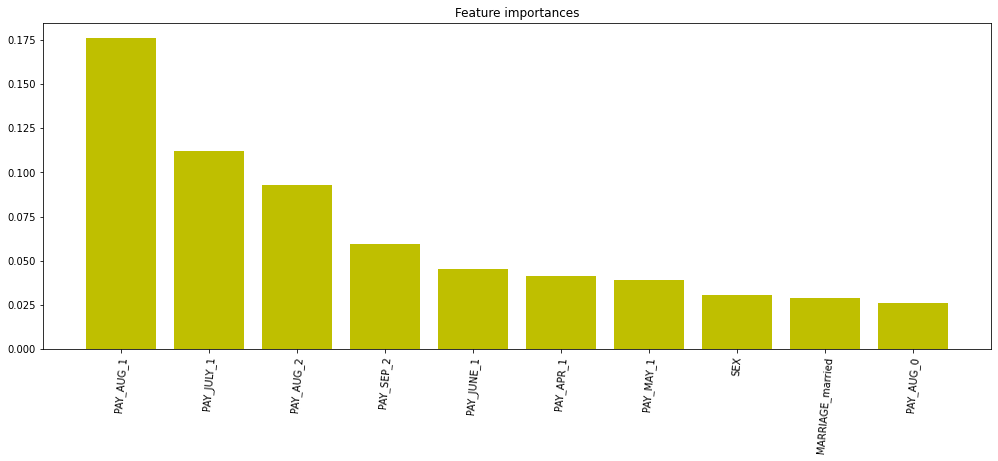

In [99]:
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importance_xgb.index, feature_importance_xgb['importance_xgb'],color='y')
plt.xticks(feature_importance_xgb.index, rotation = 85)
plt.show()

# **ROC AUC Curve**

In [100]:
y_pred_proba_xgb = optimal_xgb_result.predict_proba(X_test)[::,1]

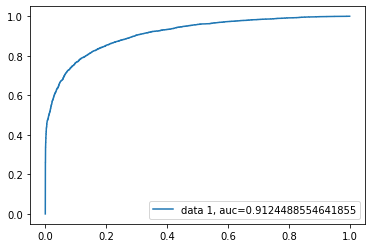

In [101]:
# Plot the curve
y_pred_proba = y_pred_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **RandomForest Implementation**

In [102]:
X = credit_df_copy.drop(['default payment next month', 'total_pay_value', 'amt_due'], axis = 1)
y = credit_df_copy['default payment next month']

In [103]:
# Apply and fit the model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [104]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

# **Model Evaluation**

In [105]:
rf_clf.score(X_train,y_train)

1.0

In [106]:
# Get the accuracy, precision, recall, f1score, roc_score
test_accuracy_rf = accuracy_score(test_class_pred, y_test)
test_precision_rf = precision_score(test_class_pred, y_test)
test_recall_rf = recall_score(test_class_pred, y_test)
test_f1_rf = f1_score(test_class_pred, y_test)
test_roc_rf = roc_auc_score(test_class_pred, y_test)

print('The accuracy on test data is ', test_accuracy_rf)
print('The precision on test data is ', test_precision_rf)
print('The recall on test data is ', test_recall_rf)
print('The f1 score on test data is ', test_f1_rf)
print('The roc score on test data is ', test_roc_rf)

The accuracy on test data is  0.8330765279917822
The precision on test data is  0.7950693374422187
The recall on test data is  0.8604780433574208
The f1 score on test data is  0.8264815803523758
The roc score on test data is  0.8350122913684479


We can see from above results that we are getting around 99% train accuracy and 82% for test accuracy which depicts that model is overfitting.

# **Hyperparameter Tuning**

In [107]:
# Set the parameter
param_grid = {'n_estimators': [150,200,250], 'max_depth':[20,40,60]}

In [108]:
# Fit the parameter
grid_rf_clf = GridSearchCV(RandomForestClassifier(),param_grid, scoring='accuracy', n_jobs=-1, verbose = 3, cv = 5)
grid_rf_clf.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 40, 60],
                         'n_estimators': [150, 200, 250]},
             scoring='accuracy', verbose=3)

In [109]:
# Check the best score
grid_rf_clf.best_score_

0.8371284973120966

In [110]:
# Check the best parameter
grid_rf_clf.best_params_

{'max_depth': 60, 'n_estimators': 200}

In [111]:
# create a variable for best estimator
optimal_rf_result = grid_rf_clf.best_estimator_

In [112]:
# Get the predicted class
train_class_pred = optimal_rf_result.predict(X_train)
test_class_pred = optimal_rf_result.predict(X_test)

In [113]:
train_accuracy_rf_tuned = accuracy_score(train_class_pred,y_train)
test_accuracy_rf_tuned = accuracy_score(test_class_pred,y_test)

print('The accuracy score on train data after hyperparameter tuning is ', train_accuracy_rf_tuned)
print('The accuracy score on test data after hyperparameter tuning is ', test_accuracy_rf_tuned)

The accuracy score on train data after hyperparameter tuning is  1.0
The accuracy score on test data after hyperparameter tuning is  0.8417223078240027


In [114]:
test_accuracy_rf_tuned = accuracy_score(test_class_pred,y_test)
test_precision_rf_tuned = precision_score(test_class_pred,y_test)
test_recall_rf_tuned = recall_score(test_class_pred,y_test)
test_f1_rf_tuned = f1_score(test_class_pred,y_test)
test_roc_rf_tuned = roc_auc_score(test_class_pred,y_test)

print('The accuracy after hyperparameter tuning is', test_accuracy_rf_tuned)
print('The precision after hyperparameter tuning is ', test_precision_rf_tuned)
print('The recall after hyperparameter tuning is ', test_recall_rf_tuned)
print('The f1 score after hyperparameter tuning is ', test_f1_rf_tuned)
print('The roc score after hyperparameter tuning is ', test_roc_rf_tuned)

The accuracy after hyperparameter tuning is 0.8417223078240027
The precision after hyperparameter tuning is  0.8127033042287279
The recall after hyperparameter tuning is  0.8627771719374773
The f1 score after hyperparameter tuning is  0.8369919774310147
The roc score after hyperparameter tuning is  0.8428772591078972


# **Confusion Matrix**

In [115]:
cnf_matrix_rf = confusion_matrix(y_train, train_class_pred)
print(cnf_matrix_rf)

[[17523     0]
 [    0 17523]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

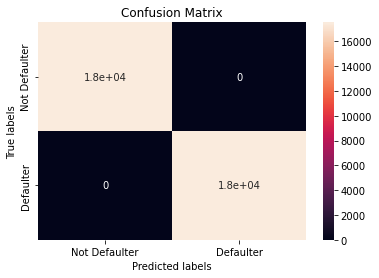

In [116]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cnf_matrix_rf, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Feature Importance**

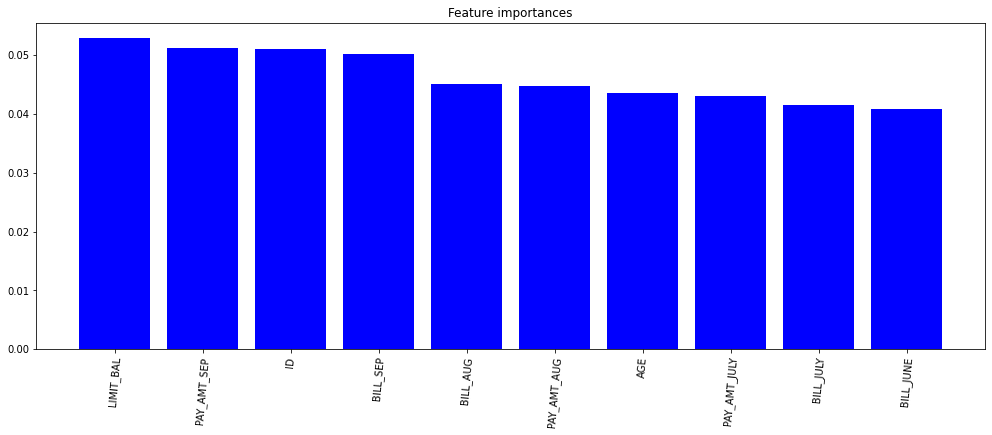

In [117]:
feature_importance_rf = pd.DataFrame(optimal_rf_result.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importance_rf.index, feature_importance_rf['importance_rf'],
        color="b",  align="center")
plt.xticks(feature_importance_rf.index, rotation = 85)
plt.show()

From the above feature importance graph we can say that the most important feature that make an impact on dependt variable are LIMIT_BAL and PAY_SEP.

# **ROC AUC Curve**

In [118]:
# Get the predicted class
train_class_pred = optimal_rf_result.predict(X_train)
test_class_pred = optimal_rf_result.predict(X_test)
y_pred_proba_rf = optimal_rf_result.predict_proba(X_test)[::,1]

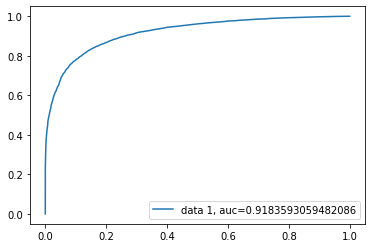

In [119]:
y_pred_proba = y_pred_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


# **Support Vector Classifier(SVC) Implementation:**

A support vector machine (SVM) is a type of deep learning algorithm that performs supervised learning for classification or regression of data groups. In AI and machine learning, supervised learning systems provide both input and desired output data, which are labeled for classification.

In [120]:
# Create the copy of dataset
credit_df_svc = credit_df_copy.copy()

In [121]:
# Create the parameters
param_grid_svc = {'C':[5],'kernel':['rbf']} 

In [122]:
# Standardise the dataset
scaler_svc = StandardScaler()
X = scaler_svc.fit_transform(X)

In [123]:

# Split the dataset
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify= y)

In [124]:
# Set the parameter and fit the model
grid_svc_clf = GridSearchCV(SVC(probability=True),param_grid_svc,scoring='accuracy',n_jobs= -1, verbose = 3, cv= 2)
grid_svc_clf.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


GridSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [5], 'kernel': ['rbf']}, scoring='accuracy',
             verbose=3)

In [125]:
# Get the best parameters
grid_svc_clf.best_params_

{'C': 5, 'kernel': 'rbf'}

In [126]:
# Get the best score
grid_svc_clf.best_score_

0.7738400958739942

In [127]:
# Get the best estimator
optimal_svc_result = grid_svc_clf.best_estimator_
optimal_svc_result

SVC(C=5, probability=True)

# **Model Evaluation**

In [128]:
# Get the predicted class
train_class_pred_svc = optimal_svc_result.predict(X_train)
test_class_pred_svc = optimal_svc_result.predict(X_test)

In [129]:
# Get the accuracy score
train_accuracy_svc = accuracy_score(train_class_pred_svc,y_train)
test_accuracy_svc = accuracy_score(test_class_pred_svc,y_test)

print('The accuracy on train data is ', train_accuracy_svc)
print('The accuracy on train data is ', test_accuracy_svc)

The accuracy on train data is  0.8040289904696685
The accuracy on train data is  0.7826570792672488


In [130]:
#Get the accuracy, precision, recall, f1score, roc_score after hyperparameter tuning
test_accuracy_svc = accuracy_score(test_class_pred_svc,y_test)
test_precision_svc = precision_score(test_class_pred_svc,y_test)
test_recall_svc = recall_score(test_class_pred_svc,y_test)
test_f1_svc = f1_score(test_class_pred_svc,y_test)
test_roc_svc = roc_auc_score(test_class_pred_svc,y_test)

print('The accuracy score on test data is ', test_accuracy_svc)
print('The precision score on test data is ', test_precision_svc)
print('The recall on test data is', test_recall_svc)
print("The f1 score on test data is ", test_f1_svc)
print('The roc score on tes data is ', test_roc_svc)

The accuracy score on test data is  0.7826570792672488
The precision score on test data is  0.711693203218627
The recall on test data is 0.8294094173982443
The f1 score on test data is  0.7660554685340459
The roc score on tes data is  0.7884678271399017


# **Confusion Matrix**

[[15386  2137]
 [ 4731 12792]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

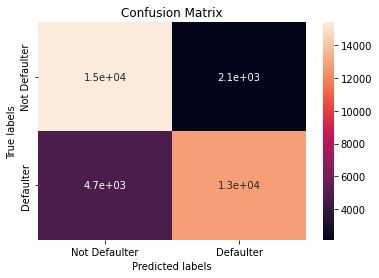

In [131]:
# Get the confusion matrix for train and test data
labels = ['Not Defaulter', 'Defaulter']
cnf_matrix_svc = confusion_matrix(y_train, train_class_pred_svc)
print(cnf_matrix_svc)

ax= plt.subplot()
sns.heatmap(cnf_matrix_svc, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **ROC AUC Curve**

In [132]:
# Get the predicted class
train_class_pred_svc = optimal_svc_result.predict(X_train)
test_class_pred_svc = optimal_svc_result.predict(X_test)

In [133]:
 #Create the variable
y_pred_proba_svc = optimal_svc_result.predict_proba(X_test)[::,1]

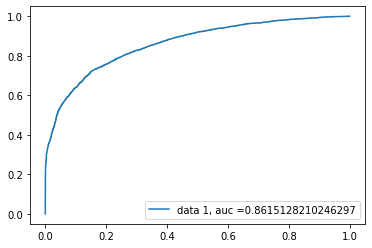

In [134]:
# Plot the curve
fpr,tpr, _ = roc_curve(y_test,y_pred_proba_svc)
auc = roc_auc_score(y_test, y_pred_proba_svc)
plt.plot(fpr,tpr,label='data 1, auc ='+str(auc))
plt.legend(loc=4)
plt.show()


# ***Evaluating all the models***

In [135]:
# Create a table for comparison of all the scores from all the models
classifiers = ['Logistic Regression', 'Xgboost CLF', 'Random Forest CLF', 'Support Vector CLF']
overall_train_accuracy = [train_accuracy_logistic, train_accuracy_xgb_tuned, train_accuracy_rf_tuned, train_accuracy_svc]
overall_test_accuracy = [test_accuracy_logistic, test_accuracy_xgb_tuned, test_accuracy_rf_tuned, test_accuracy_svc ]
overall_precision_score = [test_precision_logistic, test_precision_xgb_tuned, test_precision_rf_tuned, test_precision_svc]
overall_recall_score = [test_recall_logistic, test_recall_xgb_tuned, test_recall_rf_tuned, test_recall_svc]
overall_f1_score = [test_f1_logistic, test_f1_xgb_tuned, test_f1_rf_tuned, test_f1_svc]

In [136]:

pd.DataFrame({'Classifier':classifiers, 'Train Accuracy':overall_train_accuracy, 'Test Accuracy':overall_test_accuracy, 'Precision Score':overall_precision_score, 'Recall Score':overall_recall_score, 'F1 Score':overall_f1_score})


,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.753667,0.751498,0.687211,0.788605,0.734425
1,Xgboost CLF,0.916139,0.833077,0.795069,0.860478,0.826482
2,Random Forest CLF,1.000000,0.841722,0.812703,0.862777,0.836992
3,Support Vector CLF,0.804029,0.782657,0.711693,0.829409,0.766055


**From above comparison we can say that randomforest classifier perform best among those models.**

# **Plotting ROC AUC for all the models**

In [137]:
# Create a variable for auc curve of all the models applied
classifiers_proba = [(optimized_clf_result,y_pred_proba_logistic),
                     (optimal_rf_result,y_pred_proba_rf),
                     (optimal_xgb_result,y_pred_proba_xgb),
                     (optimal_svc_result,y_pred_proba_svc)]
# Create a dataframe of result table variable
result_table = pd.DataFrame(columns=['Classifiers', 'fpr', 'tpr', 'auc'])
# Train the model and record the result
for pair in classifiers_proba:
  fpr, tpr, _ = roc_curve(y_test, pair[1])
  auc = roc_auc_score(y_test, pair[1])
  result_table = result_table.append({'Classifiers':pair[0].__class__.__name__,
                                      'fpr':fpr,
                                      'tpr':tpr,
                                      'auc':auc},ignore_index = True)
# Set the name of the classifiers as index table
result_table.set_index('Classifiers', inplace = True) 

In [138]:
# Check the result table
result_table

,fpr,tpr,auc
Classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.0001712035610340695, 0.00017...","[0.0, 0.0001712035610340695, 0.077726416709467...",0.826820
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0001712035610340695, 0....","[0.0, 0.033042287279575415, 0.0544427324088341...",0.918359
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0001712035610340695, 0.002568053415511...",0.912449
SVC,"[0.0, 0.0, 0.0, 0.0001712035610340695, 0.00017...","[0.0, 0.0001712035610340695, 0.184557438794726...",0.861513


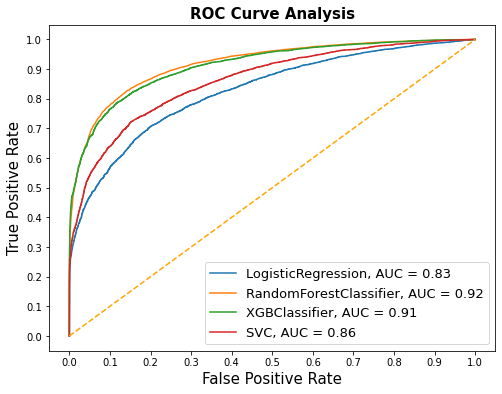

In [139]:
# Plot the auc curve of all the models for comparison
fig = plt.figure(figsize = (8,6))
for i in result_table.index:
  plt.plot(result_table.loc[i]['fpr'],
           result_table.loc[i]['tpr'],
           label="{}, AUC = {:.2f}".format(i,result_table.loc[i]['auc']))
plt.plot([0,1],[0,1],color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize = 15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize = 15)
plt.legend(prop = {'size':13}, loc = 'lower right')
plt.show()

# **Feature Importance for Recommended model**

Text(0.5, 1.0, 'Feature Importance')

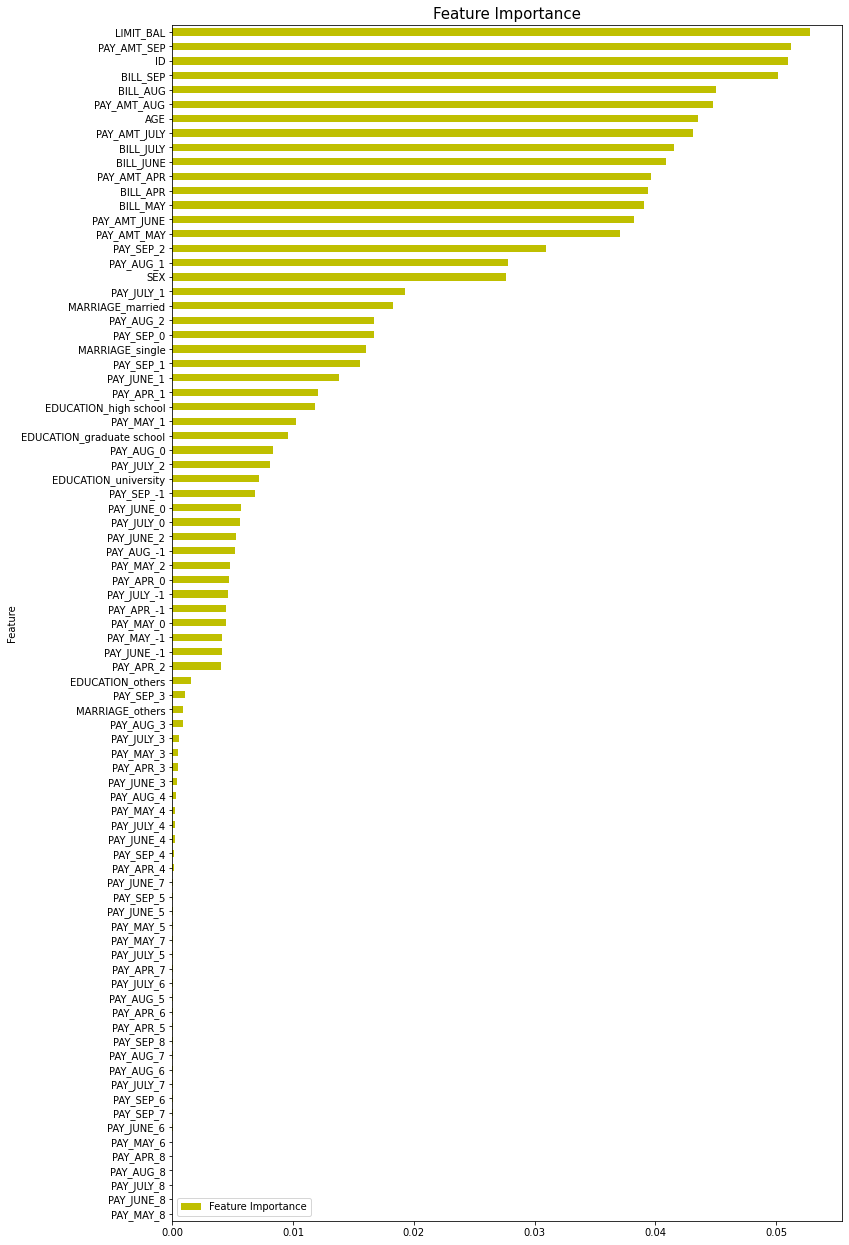

In [142]:
# Plot the feature importances of recommended model
feature_df = pd.DataFrame({'Feature': columns, 'Feature Importance': optimal_rf_result.feature_importances_})
feature_df = feature_df.sort_values(by='Feature Importance')

figure, ax = plt.subplots(figsize = (12,22))
feature_df.plot.barh(x='Feature', y='Feature Importance', ax=ax,color='y')
plt.title('Feature Importance', fontsize = 15)

**Conclusion: "LIMT_BAL","BILL_SEP" AND "PAY_AMT_SEP" are the most recent 2 months' payment status and they are the strongest predictors of future payment default risk.**

# **Overall Conclusion**


*   Data categorical variables had minority classes 


*   List itemwhich were added to their closest majority class.

*   There were not huge gap but female clients tended to default the most.

*   Labels of the data were imbalanced and had a significant difference.

*  Gradient boost gave the highest accuracy of 82% on test dataset.

*   Repayment in the month of september tended to be the most important feature for our machine learning model.

*   The best accuracy is obtained for the Random forest and XGBoost classifier.


*   From above table we can see that XGBoost Classifier having Recall = 86%, F1-score = 82%, and ROC Score = 83% and Random forest Classifier having Recall =86%, F1-score = 83% and ROC Score = 84%.

*   XGBoost Classifier and RandomForest Classifier are giving us the best Recall, F1-score, and ROC Score among other algorithms. We can conclude that these two algorithms are the best to predict whether the credit card is default or not default according to our analysis on this dataset.
